In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Since my ID mod 3 = 2. I will go with funtion 2 as per the rules.
np.mod(201693140,3)

2

## Defining the objective function and all the needed dervatives

$f(x) = \left(xy^3-x+\dfrac{21}{8}\right)^2+\left(xy^2-x+\dfrac{9}{4}\right)^2+\left(xy-x+\dfrac{3}{2}\right)^2$

In [3]:
def f(X):
    x , y = X[0], X[1]
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [4]:
f([0,1])

14.203125

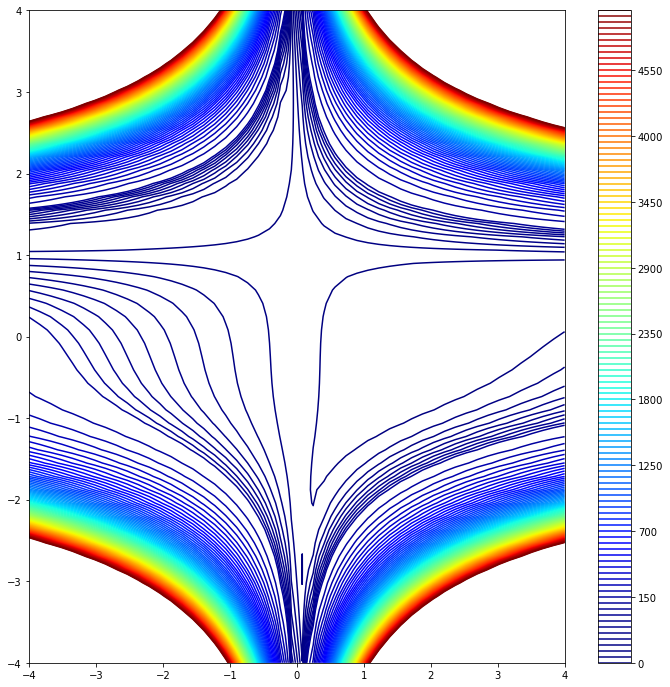

In [129]:
#define and plotting the beala funtion

#set fig size
plt.figure(figsize=(12,12))

#define the (-4,4)X(-4,4) reiigon
reigon_x1 = np.linspace(-4, 4, 50)
reigon_x2 = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(reigon_x1, reigon_x2)

#get the function output to plot
Z = f([X, Y])
#set the contour line level 
levels = [x*10 for x in range(10)]+[100+x*50 for x in range(100)]

#set the plot lines color theme and show a legend
plt.contour(X, Y, Z,levels,cmap=plt.cm.jet);
plt.colorbar();


In [79]:
def plot_optim(path,size=12):
    #set figure size
    plt.figure(figsize=(size,size))
    #plot the contour
    plt.contour(X, Y, Z,levels,cmap=plt.cm.jet);

    #seperate path cord
    path_x = []
    path_y = []

    for i in range(len(path)):
        path_x.append(path[i][0])
        path_y.append(path[i][1])

    #plot the path
    plt.scatter(path_x,path_y)  
    plt.plot(path_x,path_y)  

    #plot the actual minimum point
    plt.plot(3,0.5,'*',markersize=18,color="gold")
    
    #show
    plt.show()
    print(f'best point we got is: {path[-1]} with value = {f(path[-1])}')

# The function dervatives in python and markdown/latex

 $\frac{df}{dx} = 6xy^2\left(xy^3-x+\dfrac{21}{8}\right)+4xy\left(xy^2-x+\dfrac{9}{4}\right)+2x\left(xy-x+\dfrac{3}{2}\right)$

In [7]:
def dfdx(X):
    x , y = X[0], X[1]
    return 2*(y**3-1)*(y**3*x-x+21/8)+2*(y**2-1)*(y**2*x-x+9/4)+2*(y-1)*(y*x-x+3/2)

$\frac{df}{dy} = 2\left(y^3-1\right)\left(y^3x-x+\dfrac{21}{8}\right)+2\left(y^2-1\right)\left(y^2x-x+\dfrac{9}{4}\right)+2\left(y-1\right)\left(yx-x+\dfrac{3}{2}\right)$

In [8]:
def dfdy(X):
    x , y = X[0], X[1]
    return 6*x*y**2*(x*y**3-x+21/8)+4*x*y*(x*y**2-x+9/4)+2*x*(x*y-x+3/2)

$\frac{df}{dx^2}=2\left(y^3-1\right)^2+2\left(y^2-1\right)^2+2\left(y-1\right)^2$

In [9]:
def dfdx2(X):
    x , y = X[0], X[1]
    return 2*(y**3-1)**2+2*(y**2-1)**2+2*(y-1)**2

$ \frac{df}{dy^2} = 18x^2y^4+12xy\left(xy^3-x+\dfrac{21}{8}\right)+4x\left(xy^2-x+\dfrac{9}{4}\right)+8x^2y^2+2x^2$

In [10]:
def dfdy2(X):
    x , y = X[0], X[1]
    return 18*x**2*y**4+12*x*y*(x*y**3-x+21/8)+4*x*(x*y**2-x+9/4)+8*x**2*y**2+2*x**2

$ \frac{df}{dxdy} = 6y^2\left(xy^3-x+\dfrac{21}{8}\right)+6xy^2\left(y^3-1\right)+4y\left(xy^2-x+\dfrac{9}{4}\right)+4xy\left(y^2-1\right)+2\left(xy-x+\dfrac{3}{2}\right)+2x\left(y-1\right)$

In [11]:
def dfdxy(X):
    x , y = X[0], X[1]
    return 6*y**2*(x*y**3-x+21/8)+6*x*y**2*(y**3-1)+4*y*(x*y**2-x+9/4)+4*x*y*(y**2-1)+2*(x*y-x+3/2)+2*x*(y-1) 

$ \frac{df}{dydx} = 6y^2\left(y^3x-x+\dfrac{21}{8}\right)+4y\left(y^2x-x+\dfrac{9}{4}\right)+2\left(yx-x+\dfrac{3}{2}\right)+6y^2\left(y^3-1\right)x+4y\left(y^2-1\right)x+2\left(y-1\right)x$

In [12]:
def dfdyx(X):
    x , y = X[0], X[1]  

    return 6*y**2*(y**3*x-x+21/8)+4*y*(y**2*x-x+9/4)+2*(y*x-x+3/2)+6*y**2*(y**3-1)*x+4*y*(y**2-1)*x+2*(y-1)*x

# define the Jacobian and Hessian of the function

Let Jacobian of f be

Jacob(x,y) =
\begin{bmatrix}
\frac{df}{dx} & \frac{df}{dy}\\
\end{bmatrix}

In [13]:
def jacob(X):
    x,y = X[0], X[1]  
    return [dfdx(X),dfdy(X)]

Let Hessian  of f be

Hess(x,y) =
\begin{bmatrix}
\frac{df}{dx^2} & \frac{df}{dxdy}\\
\frac{df}{dydx} & \frac{df}{dy^2}
\end{bmatrix}

In [14]:
def hess(X):
    return [[dfdx2(X),dfdxy(X)],
            [dfdyx(X),dfdy2(X)]]

In [15]:
def det(M):
    a = M[0][0]
    b = M[0][1]
    c = M[1][0]
    d = M[1][1]
    
    return a*d - b*c

In [16]:
det([[1,2],[3,4]])

-2

In [17]:
def inverse(H):
    deter = det(H)
    a = H[0][0]*(1/deter)
    b = H[0][1]*(1/deter)
    c = H[1][0]*(1/deter)
    d = H[1][1]*(1/deter)
    
    return [[d,-b],[-c,a]]

In [18]:
inverse([[4,7],[2,6]])

[[0.6000000000000001, -0.7000000000000001], [-0.2, 0.4]]

In [19]:
jacob([1,-1])

[-0.5, -6.25]

In [20]:
hess([1,-1])

[[16, -22.25], [-22.25, 29.5]]

## Random Search

### Random search is done by generating point in the the ROI and loop through them, setting the one that returns the minimum function output as our best sample/chooice

In [21]:
def random_search(f,samples):
    #take the first sample as out best one  
    best_sample = samples[0]
    #add it to the path
    search_path = [samples[0]]

    #search loop
    for i in range(len(samples)-1):
        # load the next sample
        next_sample = samples[i]
        
        #compare current best sample with next sample and take the one with minimum function value output
        if f(next_sample) < f(best_sample):
            if math.dist(best_sample,next_sample) < 10**-3:
                print("STOP STOP STOP")
                print(math.dist(best_sample,next_sample))
                break
                
            #add the selected point the  path
            search_path.append(next_sample)
            best_sample = next_sample
        
       
            
    return search_path

In [80]:
#sample the point into an array
samples = []
for _ in range(100000):
    samples.append(np.random.uniform(-4,4,2).tolist())

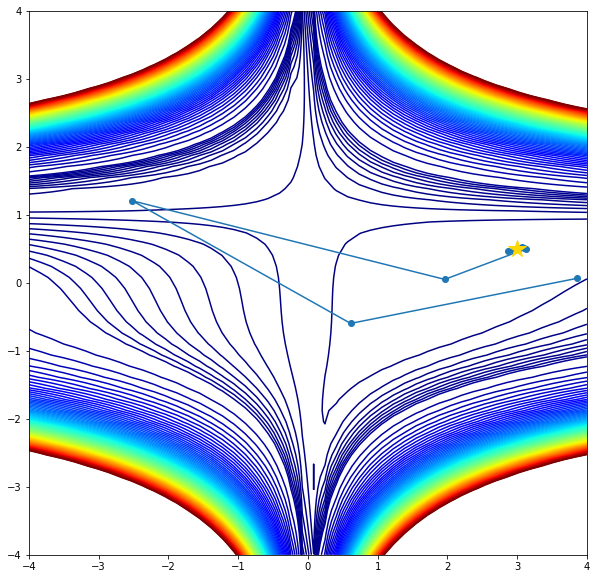

best point we got is: [2.996630183690396, 0.5000798014396013] with value = 2.1139751239137597e-05


In [130]:
#run the search and get the point path
path = random_search(f,samples)
plot_optim(path,10)

## Gradient Decent

In [97]:
def GD(df,X,lr=1e-2,append_ever=5,time_out=50000):
    path = [X]
    iterations = 0

    while True:
       
        try:
            grad = df(X)
        except:
            print("Over 9000 *BOOOM*")
            print(f'path lenght = {len(path)}')

            break
            
        new_x = X[0]-(lr*grad[0])
        new_y = X[1]-(lr*grad[1])

        if math.dist(X,[new_x,new_y]) < 10**-3: 
            print("STOP STOP STOP")
            print(f'path lenght = {len(path)}')
            break
            
        if  math.isnan(X[0]) or math.isnan(X[1]) or math.isinf(X[0]) or math.isinf(X[1]):
            print("Gradieant exploded RIP")
            print(f'path lenght = {len(path)}')
            break
        
        if np.mod(iterations,append_ever) == 0:
            path.append(X)
        if iterations == time_out:
            print("Time out F")
            print(f'path lenght = {len(path)}')
            break
            
        iterations += 1
        X = [new_x,new_y]

    return path

Over 9000 *BOOOM*
path lenght = 2


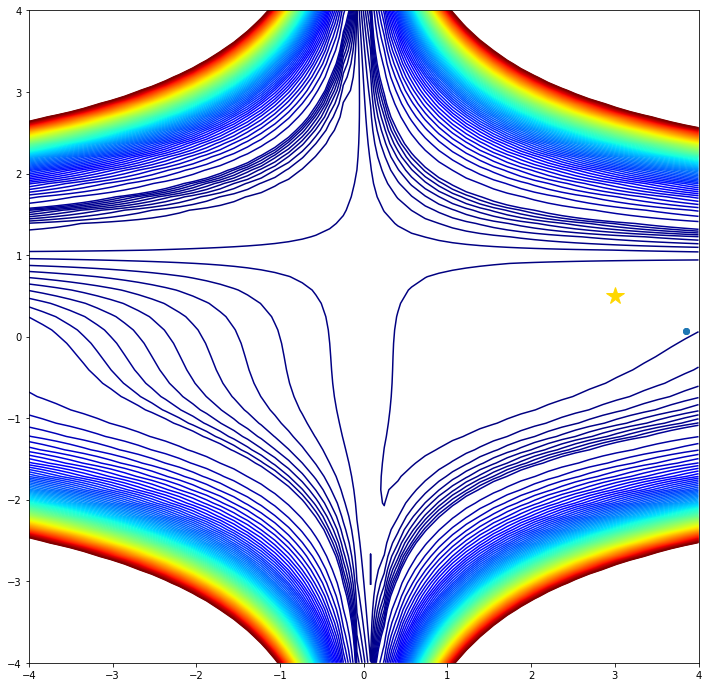

best point we got is: [3.8548775188562727, 0.06806118432133079] with value = 8.40684271341112


In [131]:
plot_optim(GD(jacob,samples[0],10))

# Newton Method

In [136]:
def nm(X,lr=1e-1,time_out=50000):
    path = [X]
    iterations = 0
    while True:
        
        inv_hess = inverse(hess(X))
        jac = jacob(X)
        
        step_x = X[0] - lr*(inv_hess[0][0]*jac[0] + inv_hess[0][1]*jac[1])
        step_y = X[1] - lr*(inv_hess[1][0]*jac[0] + inv_hess[1][1]*jac[1])
        
        if math.dist(X,[step_x,step_y]) < 10**-3: 
            print("STOP STOP STOP")
            print(f'path lenght = {len(path)}')
            break
            
        if iterations == time_out:
            print("Time out F")
            print(f'path lenght = {len(path)}')
            break
            
        iterations += 1
        X = [step_x,step_y]
        path.append(X)
        
    return path

STOP STOP STOP
path lenght = 42


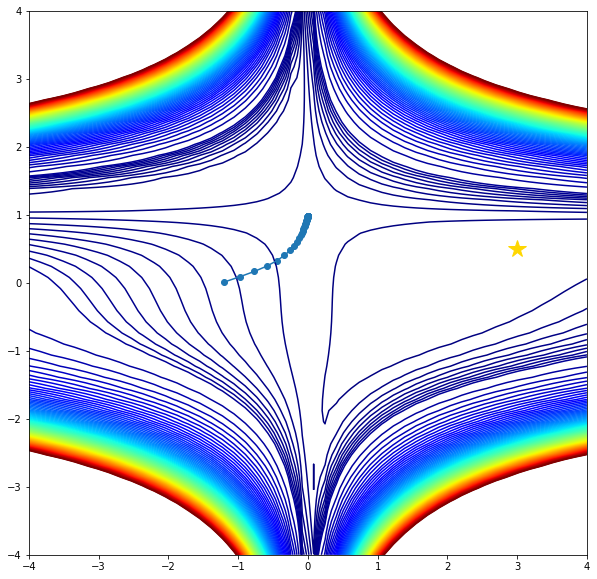

best point we got is: [-0.0024358335282756174, 0.9907585260472738] with value = 14.20374547614356


In [140]:
plot_optim(nm(samples[2000]),10)